## What does Data Preprocessing mean?

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data collection methods are loosely controlled and hence data collected has a wide range, impossible combinations and missing values. The quality of data affects the various analysis and learning of the model. Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.

Data goes through a series of steps during preprocessing:
1. Data Cleaning: Data is cleansed through processes such as filling in missing values, smoothing the noisy data, or resolving the inconsistencies in the data.
2. Data Integration: Data with different representations are put together and conflicts within the data are resolved.
3. Data Transformation: Data is normalized, aggregated and generalized.
4. Data Reduction: This step aims to present a reduced representation of the data.

## Preprocessing in Python

In python, scikit-learn library has a pre-built functionality under sklearn.preprocessing which allows us to deal with cleaning, transformation and integration of the data. The pandas library also helps us in dealing with the missing values and the outliars in the dataset. 

In [47]:
#import the general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#get the dataset
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [49]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
dataset = pd.concat([train, test],ignore_index=True)

In [50]:
#Building a dataset based on the hypothesis generated
dataset = dataset[['source', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 
                   'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','CentralAir', '1stFlrSF',
                   '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars',
                   'KitchenAbvGr', 'YrSold', 'FullBath','HalfBath', 'SalePrice', ]]

In [51]:
dataset.head()

,source,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
0,train,CollgCr,1Fam,2Story,7,2003,2003,856.0,Y,856,854,1710,8,2.0,1,2008,2,1,208500.0
1,train,Veenker,1Fam,1Story,6,1976,1976,1262.0,Y,1262,0,1262,6,2.0,1,2007,2,0,181500.0
2,train,CollgCr,1Fam,2Story,7,2001,2002,920.0,Y,920,866,1786,6,2.0,1,2008,2,1,223500.0
3,train,Crawfor,1Fam,2Story,7,1915,1970,756.0,Y,961,756,1717,7,3.0,1,2006,1,0,140000.0
4,train,NoRidge,1Fam,2Story,8,2000,2000,1145.0,Y,1145,1053,2198,9,3.0,1,2008,2,1,250000.0


In [52]:
#Check missing values
dataset.isnull().sum()

source             0
Neighborhood       0
BldgType           0
HouseStyle         0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
TotalBsmtSF        1
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
TotRmsAbvGrd       0
GarageCars         1
KitchenAbvGr       0
YrSold             0
FullBath           0
HalfBath           0
SalePrice       1459
dtype: int64

In [53]:
dataset.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
count,2919.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,6.089072,1971.312778,1984.264474,1051.777587,1159.581706,336.483727,1500.759849,6.451524,1.766621,1.044536,2007.792737,1.568003,0.380267,180921.195890
std,1.409947,30.291442,20.894344,440.766258,392.362079,428.701456,506.051045,1.569379,0.761624,0.214462,1.314964,0.552969,0.502872,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,334.000000,2.000000,0.000000,0.000000,2006.000000,0.000000,0.000000,34900.000000
25%,5.000000,1953.500000,1965.000000,793.000000,876.000000,0.000000,1126.000000,5.000000,1.000000,1.000000,2007.000000,1.000000,0.000000,129975.000000
50%,6.000000,1973.000000,1993.000000,989.500000,1082.000000,0.000000,1444.000000,6.000000,2.000000,1.000000,2008.000000,2.000000,0.000000,163000.000000
75%,7.000000,2001.000000,2004.000000,1302.000000,1387.500000,704.000000,1743.500000,7.000000,2.000000,1.000000,2009.000000,2.000000,1.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,5095.000000,2065.000000,5642.000000,15.000000,5.000000,3.000000,2010.000000,4.000000,2.000000,755000.000000


### Dealing with missing values and outliers

From the desciption of the dataset(including the values in each attribute) we have a wide observation and values to deal with.
1. The minimum number of kitchen, full and half bath in the house is zero, there is no house with no kitchen and at least one full bath
2. We also have minimum GroundLiving area as 334 sq feet which is too small for a house! 
3. Missing Basement surface area

##### 1.  Minimum number of Kitchen and full bath can not be zero! 

In [54]:
Kitchen_zero = dataset

In [55]:
Kitchen_zero_points = Kitchen_zero['KitchenAbvGr'] == 0
Kitchen_zero[Kitchen_zero_points]

,source,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
954,train,Edwards,Duplex,SFoyer,6,1975,1975,945.0,Y,980,0,980,4,0.0,0,2006,2,0,127500.0
2587,test,Mitchel,1Fam,SLvl,7,1975,1975,852.0,Y,918,0,918,4,1.0,0,2007,1,0,NaN
2859,test,Edwards,Duplex,SFoyer,6,1975,1975,976.0,Y,1012,0,1012,4,0.0,0,2006,2,0,NaN


Every house has at least one kitchen. Rather than assuming anything, I have replaced the zero value in the kitchen attribute to the mode value of the column. While dealing with missing and outliar values, we can replace the value with either mode, median or mean. Here, taking the mode (usually we prefer to work with mode or mean value for continous variables) is more suitable as it will leave us with a whole number value for the attribute and avoid the trouble of getting a non realistic integer value.

The statistics library in python provides us the functionality to find the mode of the necessary values. 

In [56]:
#replace zero with mode
from statistics import mode
dataset['KitchenAbvGr'] = dataset['KitchenAbvGr'].replace(0,mode(dataset['KitchenAbvGr']))

In [57]:
bathroom_zero = dataset

In [58]:
bathroom_zero_points = bathroom_zero['FullBath'] == 0
bathroom_zero[bathroom_zero_points]

,source,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
53,train,Veenker,1Fam,1Story,9,1981,1987,1842.0,Y,1842,0,1842,5,3.0,1,2006,0,1,385000.0
188,train,SawyerW,Duplex,SFoyer,5,1979,1979,1086.0,Y,1224,0,1224,6,2.0,2,2009,0,2,153337.0
375,train,Edwards,1Fam,1Story,1,1922,1950,683.0,N,904,0,904,4,0.0,1,2009,0,1,61000.0
597,train,Blmngtn,TwnhsE,1Story,7,2006,2007,1258.0,Y,1402,0,1402,7,3.0,1,2007,0,2,194201.0
634,train,OldTown,Duplex,SFoyer,6,1980,1980,1056.0,Y,1056,0,1056,4,2.0,2,2010,0,0,144000.0
916,train,IDOTRR,1Fam,1Story,2,1949,1950,480.0,N,480,0,480,4,1.0,1,2006,0,0,35311.0
1163,train,Sawyer,Duplex,SFoyer,4,1969,1969,1198.0,Y,1258,0,1258,6,2.0,2,2008,0,2,108959.0
1213,train,Sawyer,1Fam,SLvl,4,1965,2001,648.0,Y,960,0,960,3,1.0,1,2006,0,0,145000.0
1270,train,ClearCr,1Fam,1Story,7,1979,1979,1332.0,Y,1332,192,1524,4,2.0,1,2010,0,1,260000.0
1859,test,SawyerW,Duplex,SFoyer,5,1979,1979,1094.0,Y,1229,0,1229,6,2.0,2,2009,0,2,NaN


Definations: 
    1. Full = Tub, sink, wc
    2. 3/4 = Shower without tub, sink, wc
    3. 1/2 = Sink and wc
    
From the definition, it is very clear that any house can have no half bath but will always have a full bath (not taking into consideration some apts in modern days which claim to have no baths just to make them more cheaper!). And hence I have considered replacing the zero values in full baths to value of 1.


In [59]:
dataset['FullBath'] = dataset['FullBath'].replace(0,1)

##### 2. A house with minimum area - 334 sq feet! 

In [60]:
minimum_area_house = dataset

In [61]:
minimum_area_house_points = minimum_area_house['GrLivArea'] == 334
minimum_area_house[minimum_area_house_points]

,source,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
533,train,BrkSide,1Fam,1Story,1,1946,1950,0.0,N,334,0,334,2,0.0,1,2007,1,0,39300.0


Here, understanding the area becomes really important, I went through a few sites to understand of features of the house which is as small as 330 square feet. The houses do exist with this small area and the amenties, like the number of floors, number of kitchen, bedrooms and fullbath do meet with the searchings I went through. A typical small house is expected to have few amenties and lesser number of rooms with smaller sizes. I also wanted to look for houses which are actually smaller(GrLivArea < 500 sq feet) in size from the dataset.

In [62]:
area = minimum_area_house['GrLivArea'] < 500
minimum_area_house[area]

,source,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
533,train,BrkSide,1Fam,1Story,1,1946,1950,0.0,N,334,0,334,2,0.0,1,2007,1,0,39300.0
916,train,IDOTRR,1Fam,1Story,2,1949,1950,480.0,N,480,0,480,4,1.0,1,2006,1,0,35311.0
1100,train,SWISU,1Fam,1Story,2,1920,1950,290.0,N,438,0,438,3,1.0,1,2009,1,0,60000.0
2098,test,OldTown,1Fam,1Story,2,1946,1950,407.0,N,407,0,407,3,1.0,1,2008,1,0,NaN
2785,test,OldTown,1Fam,1Story,3,1921,1950,492.0,Y,492,0,492,3,1.0,1,2006,1,0,NaN
2871,test,Edwards,1Fam,1Story,2,1922,1955,498.0,N,498,0,498,3,1.0,1,2006,1,0,NaN


I have decided to not consider the small area of the house as outlier

##### 3. Null values in basement area and garagecars in the house

In [63]:
basement_dataset = dataset

In [64]:
basement_dataset[pd.isnull(basement_dataset['TotalBsmtSF'])]

,source,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
2120,test,BrkSide,1Fam,1Story,4,1946,1950,NaN,Y,896,0,896,4,1.0,1,2008,1,0,NaN


In [65]:
year_built = basement_dataset['YearBuilt'] == 1946
remod_year = basement_dataset['YearRemodAdd'] == 1950
area = basement_dataset['GrLivArea'] < 900

In [66]:
basement_dataset[year_built & remod_year & area]

,source,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
533,train,BrkSide,1Fam,1Story,1,1946,1950,0.0,N,334,0,334,2,0.0,1,2007,1,0,39300.0
2098,test,OldTown,1Fam,1Story,2,1946,1950,407.0,N,407,0,407,3,1.0,1,2008,1,0,NaN
2120,test,BrkSide,1Fam,1Story,4,1946,1950,NaN,Y,896,0,896,4,1.0,1,2008,1,0,NaN
2398,test,BrkSide,1Fam,1Story,3,1946,1950,666.0,N,666,0,666,4,0.0,1,2007,1,0,NaN


Here, replacing the null value of Total Basement area for the house with mean would not add knowledge to the data and infact, there are chances we would add noise to the dataset.Hence, observing the data of the houses built in year 1946 and houses remodelled in year 1950 along with houses with living area less than 900 gives us a clear picture of how the basement area was influenced in those years with factors of neighborhood and living area into consideration. 

It would be wiser to replace the basement area with the same as house area as observed from other data points. 

In [67]:
dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(dataset['GrLivArea'])

In [68]:
garage_car = dataset
garage_car[pd.isnull(garage_car['GarageCars'])]

,source,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
2576,test,IDOTRR,1Fam,2Story,5,1923,1999,859.0,Y,942,886,1828,6,NaN,1,2007,2,0,NaN


In [69]:
neighborhood = garage_car['Neighborhood'] == 'IDOTRR'
Bldg_Type = garage_car['BldgType'] == '1Fam'
HouseStyle = garage_car['HouseStyle'] == '2Story'

#the dataset
gc = garage_car[neighborhood & Bldg_Type & HouseStyle]
gc

,source,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
30,train,IDOTRR,1Fam,2Story,4,1920,1950,649.0,N,649,668,1317,6,1.0,1,2008,1,0,40000.0
329,train,IDOTRR,1Fam,2Story,5,1920,1950,596.0,N,596,596,1192,6,1.0,1,2009,1,0,78000.0
365,train,IDOTRR,1Fam,2Story,5,1920,1997,672.0,Y,672,672,1344,6,1.0,1,2009,1,0,147000.0
1096,train,IDOTRR,1Fam,2Story,6,1914,2006,684.0,Y,773,582,1355,7,0.0,1,2007,1,1,127000.0
1832,test,IDOTRR,1Fam,2Story,6,1927,1950,720.0,Y,1146,784,1930,8,1.0,1,2009,2,0,NaN
1912,test,IDOTRR,1Fam,2Story,5,1900,1993,760.0,N,928,928,2168,11,2.0,1,2009,2,0,NaN
2129,test,IDOTRR,1Fam,2Story,6,1952,1952,768.0,Y,768,768,1536,7,1.0,1,2008,1,1,NaN
2217,test,IDOTRR,1Fam,2Story,4,1895,1950,173.0,N,825,536,1361,6,1.0,1,2008,1,0,NaN
2219,test,IDOTRR,1Fam,2Story,4,1920,1950,592.0,Y,432,432,864,5,1.0,1,2008,1,1,NaN
2470,test,IDOTRR,1Fam,2Story,7,1950,2005,976.0,Y,976,976,1952,8,1.0,1,2007,1,1,NaN


Here, replacing the null value of Garage cars for the house with mean would not add knowledge to the data and infact, there are chances we would add noise to the dataset.Hence, observing the data of the a 1Family, 2Story houses built in the neighborhood gives us a picture of the number of cars the garage would accomodate. 

I have replaced the null values with mode of the houses with similar observations

In [70]:
from statistics import mode
dataset['GarageCars'] = dataset['GarageCars'].fillna(mode(gc['GarageCars']))

In [71]:
#dataset with no null or outliars
dataset.head()

,source,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,KitchenAbvGr,YrSold,FullBath,HalfBath,SalePrice
0,train,CollgCr,1Fam,2Story,7,2003,2003,856.0,Y,856,854,1710,8,2.0,1,2008,2,1,208500.0
1,train,Veenker,1Fam,1Story,6,1976,1976,1262.0,Y,1262,0,1262,6,2.0,1,2007,2,0,181500.0
2,train,CollgCr,1Fam,2Story,7,2001,2002,920.0,Y,920,866,1786,6,2.0,1,2008,2,1,223500.0
3,train,Crawfor,1Fam,2Story,7,1915,1970,756.0,Y,961,756,1717,7,3.0,1,2006,1,0,140000.0
4,train,NoRidge,1Fam,2Story,8,2000,2000,1145.0,Y,1145,1053,2198,9,3.0,1,2008,2,1,250000.0


Replacing all the values in Neighborhood, Building Type and House Style to an understandable format

In [72]:
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['CollgCr'], 'College Creek')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['Blmngtn'], 'Bloomington Heights')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['Blueste'], 'Bluestem')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['BrDale'], 'Briardale')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['BrkSide'], 'Brookside')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['ClearCr'], 'Clear Creek')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['Crawfor'], 'Crawford')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['IDOTRR'], 'Iowa DOT and Rail Road')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['MeadowV'], 'Meadow Village')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['Mitchel'], 'Mitchell')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['NAmes'], 'North Ames')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['NoRidge'], 'Northridge')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['NPkVill'], 'Northpark Villa')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['NridgHt'], 'Northridge Heights')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['NWAmes'], 'Northwest Ames')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['OldTown'], 'Old Town')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['SWISU'], 'South & West of Iowa State University')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['SawyerW'], 'Sawyer West')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['Somerst'], 'Somerset')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['StoneBr'], 'Stone Brook')
dataset['Neighborhood'] = dataset['Neighborhood'].replace(['Timber'], 'Timberland')


dataset['BldgType'] = dataset['BldgType'].replace(['1Fam'], 'Single-family Detached')
dataset['BldgType'] = dataset['BldgType'].replace(['2FmCon'], 'Two-family Conversion')
dataset['BldgType'] = dataset['BldgType'].replace(['Duplx'], 'Duplex')
dataset['BldgType'] = dataset['BldgType'].replace(['TwnhsE'], 'Townhouse End Unit')
dataset['BldgType'] = dataset['BldgType'].replace(['TwnhsI'], 'Townhouse Inside Unit')


dataset['HouseStyle'] = dataset['HouseStyle'].replace(['1Story'], 'One story')
dataset['HouseStyle'] = dataset['HouseStyle'].replace(['1.5Fin'], '1.5 story: 2nd level finished')
dataset['HouseStyle'] = dataset['HouseStyle'].replace(['1.5Unf'], '1.5 story: 2nd level unfinished')
dataset['HouseStyle'] = dataset['HouseStyle'].replace(['2Story'], 'Two story')
dataset['HouseStyle'] = dataset['HouseStyle'].replace(['2.5Fin'], '2.5f story: 2nd level finished')
dataset['HouseStyle'] = dataset['HouseStyle'].replace(['2.5Unf'], '2.5 story: 2nd level unfinished')
dataset['HouseStyle'] = dataset['HouseStyle'].replace(['SFoyer'], 'Split Foyer')
dataset['HouseStyle'] = dataset['HouseStyle'].replace([' SLvl'], 'Split Level')



In [73]:
#train_dataset for Relationship 
train_dataset = dataset

In [74]:
train_dataset = train_dataset.loc[train_dataset['source']=="train"]

In [75]:
#Dataset for BI
dataset.to_csv("BI_train.csv")

In [76]:
SalePrice_data = train_dataset

In [77]:
Cost_per_sf = train_dataset

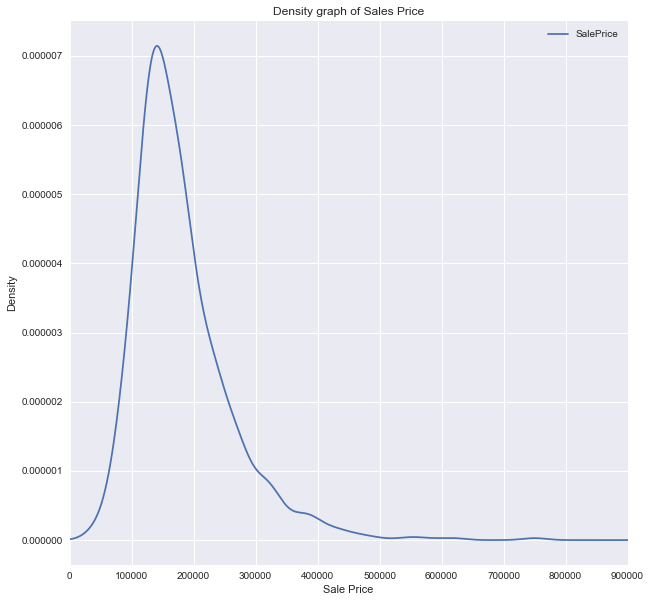

Mean of Sales:
SalePrice    180921.19589
dtype: float64
Standard deviation of Sales:
SalePrice    79442.502883
dtype: float64
Median of Sales:
SalePrice    163000.0
dtype: float64


In [78]:
#Learning the relationships
SalePrice_data_distribution = pd.DataFrame(SalePrice_data[['SalePrice']])
SalePrice_data_distribution.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density graph of Sales Price')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.show()

print ('Mean of Sales:')
print (SalePrice_data_distribution.mean())
print ('Standard deviation of Sales:')
print (SalePrice_data_distribution.std())
print ('Median of Sales:')
print (SalePrice_data_distribution.median())

In [79]:
Cost_per_sf.loc[:,'CostPerSquareFeet'] = Cost_per_sf['SalePrice']/Cost_per_sf['GrLivArea']

C:\Users\Baby Panda\Anaconda\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Baby Panda\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [80]:
print (Cost_per_sf['CostPerSquareFeet'].median())

120.09903146697134


The Sale Price has a normal distribution with a deviation of `$`79,442 dollars. It is right skewed indicating the density of houses being much less at the greater end of Sale Price.Sale Price median according to our analysis is `$`163,000 and it is increased to `$`174,000(<i>source:zillow and trulia</i>) today with statistics indicating that there has been 6.9% increase in the median of sale prices over the past year. According to Zillow, the median list price in Ames is `$`175 per sq feet whereas it was `$`120 over a period of 2006 - 2010


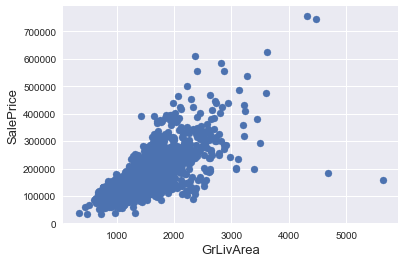

In [81]:
#Relation of gr area and Sale Price
#Plot gr liv and Sale Price
fig, ax = plt.subplots()
ax.scatter(x = train_dataset['GrLivArea'], y = train_dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [82]:
#deleting points
train_dataset = train_dataset.drop(train_dataset[(train_dataset['GrLivArea']>4000) & (train_dataset['SalePrice']<300000)].index)

Linear relation between Sale Price and GrLivArea can be clearly drawn from the plot. We can see some outliars here, some houses with extremely large area have very low sale prices which have been removed to make our model more robust.

I will be using this further for creating my first model with a linear regression between area of the house and the sale price

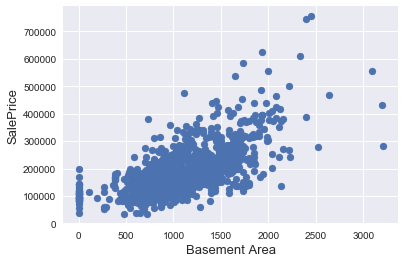

In [83]:
#Plot basement area and Sale Price
fig, ax = plt.subplots()
ax.scatter(x = train_dataset['TotalBsmtSF'], y = train_dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Basement Area', fontsize=13)
plt.show()

Basement area and sale price have a linear relation with a slope much more steeper indicating that for a unit change in basement area there is a higher change in saleprice. We also observe an outlier here and it's important to get rid of it.

In [84]:
#deleting points
train_dataset = train_dataset.drop(train_dataset[(train_dataset['TotalBsmtSF']>6000) & (train_dataset['SalePrice']<300000)].index)

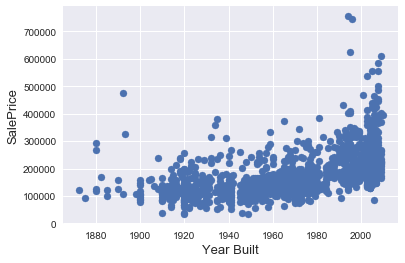

In [85]:
#Plot basement area and Sale Price
fig, ax = plt.subplots()
ax.scatter(x = train_dataset['YearBuilt'], y = train_dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Year Built', fontsize=13)
plt.show()

The house prices observe a drastic increase after 2000 and seems like the house buying trend has also increased compared to the earlier years.

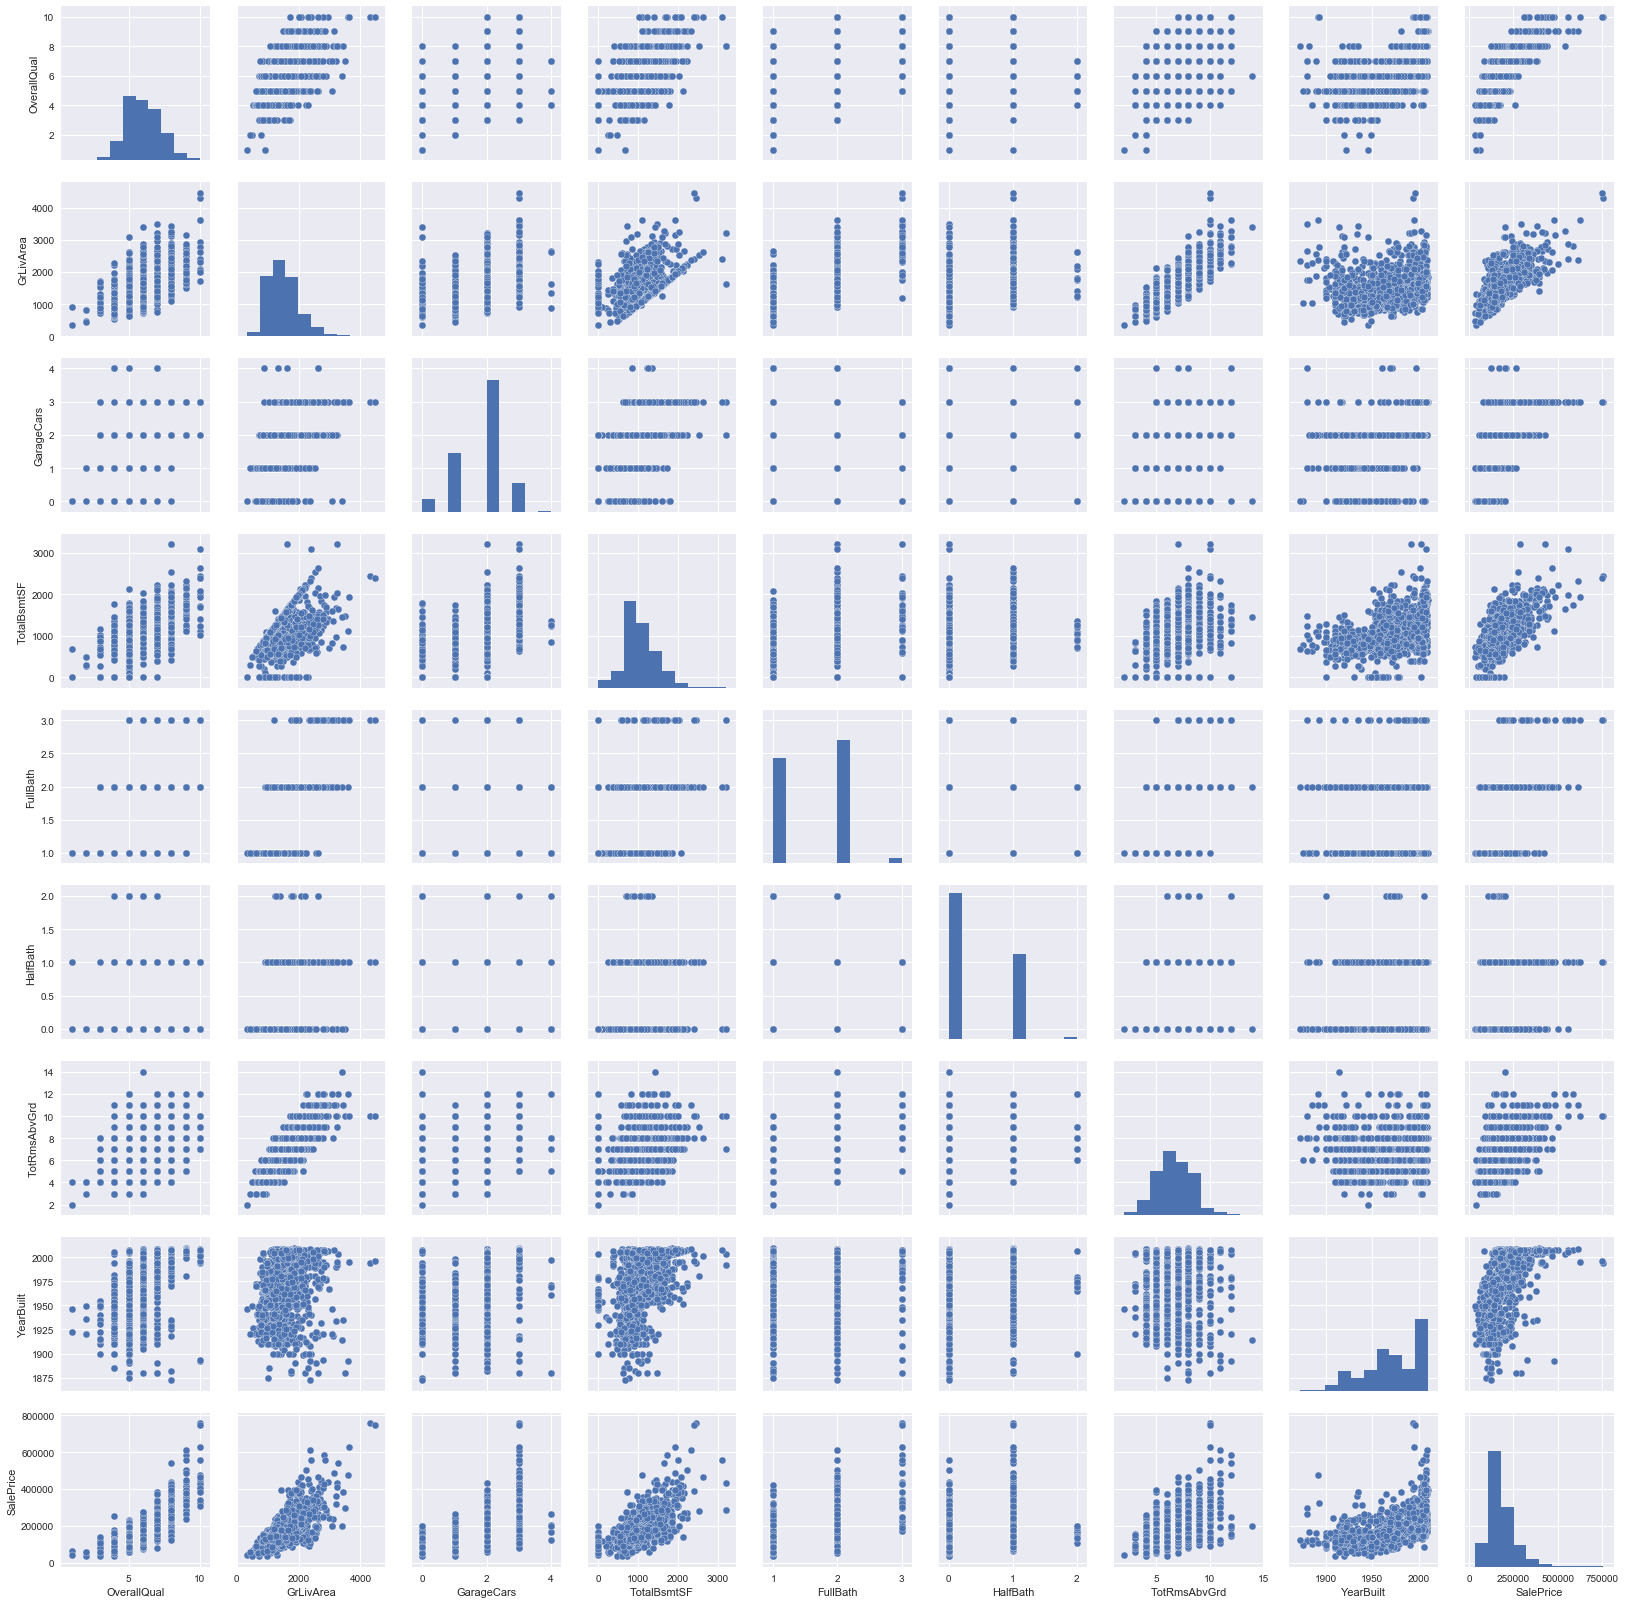

In [87]:
#all plot
sns.set()
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','HalfBath', 'TotRmsAbvGrd' ,'YearBuilt', 'SalePrice']
sns.pairplot(train_dataset[cols], size = 2.5)
plt.show()


We can draw the following conclusions from the above plot:
1. The sale price increases with the overall quality 
2. Area and sale price have a linear relation
3. Higher the number of cars in a garage, a value is added to the sale price but that trend changes when the number of cars exceeds 3 in count.

#### Label Encoding
The data set will contain categorical variables. These variables are typically stored as text values which represent various traits. The challenge is determining how to use this data in the analysis. Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. The scikit-learn library provide several approaches that can be applied to transform the categorical data into suitable numeric values. Label encoding is simply converting each value in a column to a number. get_dummies further convert this to columns with a 1 or 0 corresponding to the correct value

In [88]:
#Preprocess the data-encoding using Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
dataset.iloc[:, 1] = labelencoder_X.fit_transform(dataset.iloc[:, 1])
dataset.iloc[:, 2] = labelencoder_X.fit_transform(dataset.iloc[:, 2])
dataset.iloc[:, 3] = labelencoder_X.fit_transform(dataset.iloc[:, 3])
dataset.iloc[:, 8] = labelencoder_X.fit_transform(dataset.iloc[:, 8])

In [89]:
#apply one hot encoding
dataset = pd.get_dummies(dataset, columns=['Neighborhood','BldgType','HouseStyle','CentralAir'])

In [90]:
dataset.head()

,source,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,...,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,CentralAir_0,CentralAir_1
0,train,7,2003,2003,856.0,856,854,1710,8,2.0,...,0,0,0,0,0,0,0,1,0,1
1,train,6,1976,1976,1262.0,1262,0,1262,6,2.0,...,0,0,0,0,1,0,0,0,0,1
2,train,7,2001,2002,920.0,920,866,1786,6,2.0,...,0,0,0,0,0,0,0,1,0,1
3,train,7,1915,1970,756.0,961,756,1717,7,3.0,...,0,0,0,0,0,0,0,1,0,1
4,train,8,2000,2000,1145.0,1145,1053,2198,9,3.0,...,0,0,0,0,0,0,0,1,0,1


In [91]:
#Divide into test and train:
train_modified = dataset.loc[dataset['source']=="train"]
test_modified = dataset.loc[dataset['source']=="test"]

In [92]:
test_modified.drop(['source'],axis=1,inplace=True)
train_modified.drop(['source'],axis=1,inplace=True)

C:\Users\Baby Panda\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Baby Panda\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
train_modified.to_csv("modified_train.csv")
test_modified.to_csv("modified_test.csv")

### Link to [predictive modelling](https://github.com/hmangrola/Predicting-House-Prices-Ames-Iowa/blob/master/Predictive%20modelling.ipynb) notebook

The notebook is licensed (license found on github repository)